In [6]:
from PIL import Image
from diffusers import LDMSuperResolutionPipeline
import torch
import requests
from io import BytesIO
from urllib.parse import urlparse


class SuperResolutionModel:
    def __init__(self, model_id: str = "CompVis/ldm-super-resolution-4x-openimages", num_steps: int = 50, device: str = "cuda"):
        self.num_steps = num_steps
        self.pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
        self.pipeline = self.pipeline.to(device)

    def get_extention_filter(self, img_url):
        extension = urlparse(img_url).path.strip("/").rsplit(".", 1)[-1]
        return extension

    @staticmethod
    def png_to_jpg(image):
        image = image.convert('RGB')
        return image

    def __call__(self, source_url: str, target_url: str):
        response = requests.get(source_url)
        image = Image.open(BytesIO(response.content)).resize((128, 128))

        extention = self.get_extention_filter(source_url)
        if extention == "png":
            image = self.png_to_jpg(image)

        upscaled_image = self.pipeline(image, num_inference_steps=self.num_steps, eta=1).images[0]
        torch.cuda.empty_cache()

        return upscaled_image

In [7]:
superres_model = SuperResolutionModel()

vqvae/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.66it/s]


In [3]:
url = "https://storage.yandexcloud.net/travel-hack/dev/original_images/a90ba48d827e40ed955cf962be5c5daa.jpg"

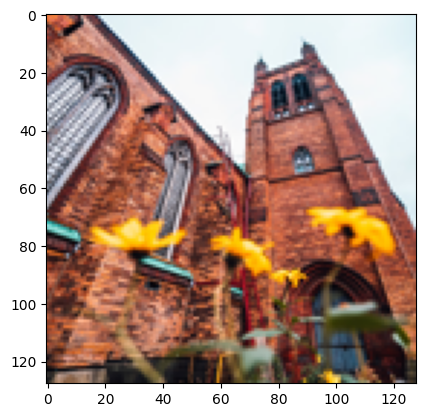

In [5]:
import matplotlib.pyplot as plt

response = requests.get(url)
image = Image.open(BytesIO(response.content)).resize((128, 128))
plt.imshow(image)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.04it/s]


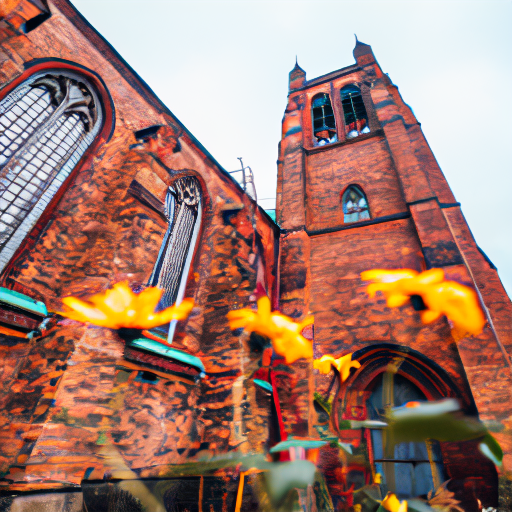

In [8]:
superres_model(
    url,
    None
)